# 刚体的表示——建立坐标系

## 初步生成根据向量生成坐标

In [7]:
import numpy as np
import matplotlib.pyplot as plt
Point_A=np.array([1,2])
Point_B=np.array([2,3])
Line_AB=Point_B-Point_A

In [5]:
def frame_show(Point_A,Point_B,ax):
    import numpy as np
    R90=np.array([[0,-1],[1,0]])
    Line_AB=Point_B-Point_A
    ax.arrow(Point_A[0],Point_A[1],Line_AB[0],Line_AB[1],head_width=0.5,length_includes_head=True,color="red")
    R90=np.array([[0,-1],[1,0]])#旋转公式
    Line_AB_Rot90=R90.dot(Line_AB)#点乘 
    ax.arrow(Point_A[0],Point_A[1],Line_AB_Rot90[0],Line_AB_Rot90[1],head_width=0.5,length_includes_head=True,color="green")
    plt.scatter(Point_A[0],Point_A[1])

(-10.0, 10.0)

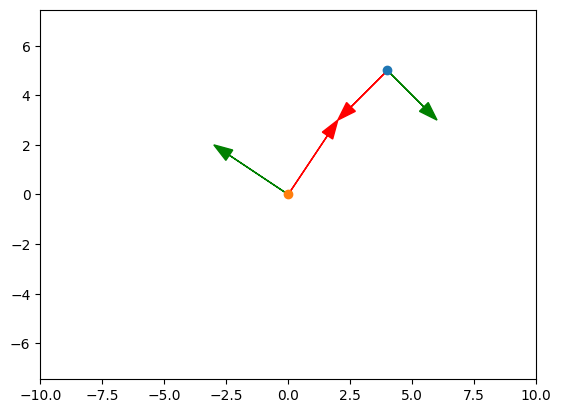

In [8]:
ax=plt.axes()
frame_show(np.array([4,5]),Point_B,ax)
frame_show(np.array([0,0]),Point_B,ax)
plt.axis('equal')# 等轴
plt.xlim([-10,10])
plt.ylim([-10,10])

#### 更改生成单位向量的坐标

In [9]:
def frame_show(label,Point_A,Point_B,ax,size):
    import numpy as np
    R90=np.array([[0,-1],[1,0]])
    Line_AB=Point_B-Point_A
    norm_Line_AB=np.linalg.norm(Line_AB)
    if norm_Line_AB!=1:
        Line_AB=Line_AB/norm_Line_AB*size
    ax.arrow(Point_A[0],Point_A[1],Line_AB[0],Line_AB[1],head_width=0.5,length_includes_head=True,color="red")
    R90=np.array([[0,-1],[1,0]])#旋转公式
    Line_AB_Rot90=R90.dot(Line_AB)#点乘 
    ax.arrow(Point_A[0],Point_A[1],Line_AB_Rot90[0],Line_AB_Rot90[1],head_width=0.5,length_includes_head=True,color="green")
    plt.scatter(Point_A[0],Point_A[1])
    label="{"+str(label)+"}"
    plt.text(Point_A[0],Point_A[1],label)

(-10.0, 10.0)

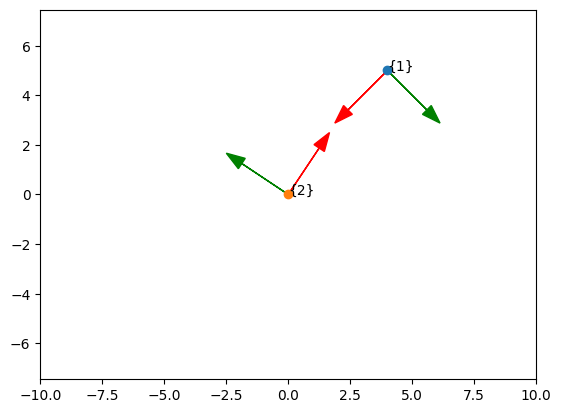

In [10]:
ax=plt.axes()
frame_show(1,np.array([4,5]),Point_B,ax,3)
frame_show(2,np.array([0,0]),Point_B,ax,3)
plt.axis('equal')# 等轴
plt.xlim([-10,10])
plt.ylim([-10,10])

### 由坐标中心和角度生成坐标

In [11]:
def Rot_func(angle):
    import numpy as np
    angle=np.deg2rad(angle)
    R90=np.array([[0,-1],[1,0]])
    elem_sim=lambda elem: np.around(elem,0) if (elem-np.around(elem,0))<1e-10 else elem
    A11=elem_sim(np.cos(angle))
    A12=elem_sim(-np.sin(angle))
    A21=elem_sim(np.sin(angle))
    A22=A11
    Rot=np.array([[A11,A12],[A21,A22]])
    return Rot

In [12]:
def frame_show_angle_center(label,center,angle,ax,size):
    Rot=Rot_func(angle)
    x=np.array([1,0])
    x=Rot.dot(x)
    frame_show(label,center,x+center,ax,size)

(-10.0, 10.0)

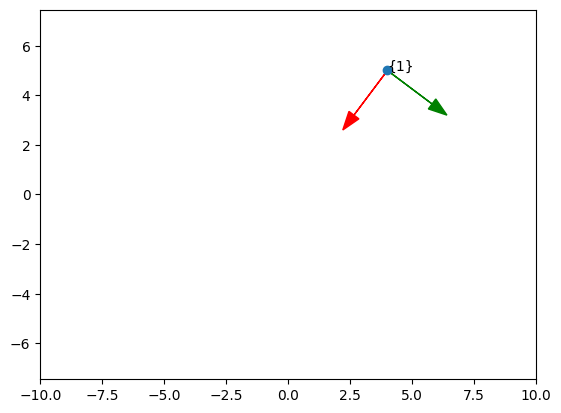

In [13]:
ax=plt.axes()
frame_show_angle_center(1,np.array([4,5]),45,ax,3)
plt.axis('equal')# 等轴
plt.xlim([-10,10])
plt.ylim([-10,10])